In [1]:

import nest_asyncio
nest_asyncio.apply()

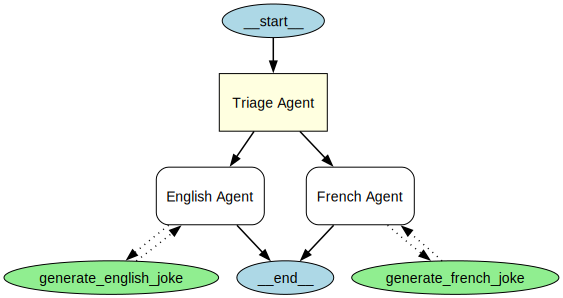

In [8]:
import os
from dotenv import load_dotenv
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel, function_tool
from agents.extensions.visualization import draw_graph
from agents.run import RunConfig
import asyncio

# Load the environment variables from the .env file
load_dotenv()

gemini_api_key = os.getenv("GEMINI_API_KEY")

# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

config = RunConfig(
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)


@function_tool
def generate_english_joke():
    """Generate a random English joke."""
    return "Why did the chicken cross the road? To get to the other side."

@function_tool
def generate_french_joke():
    """Generate a random French joke."""
    return "Pourquoi les Français aiment-ils les pommes ? Parce qu'elles sont françaises."





english_agent = Agent(
    name="English Agent",
    instructions="You are a helpful assistant that speaks English.",
    handoff_description="An English expert agent",
    model=model,
    tools=[generate_english_joke]
)

french_agent = Agent(
    name="French Agent",
    instructions="You are a helpful assistant that speaks French.",
    handoff_description="A French expert agent",
    model=model,
    tools=[generate_french_joke]
)



triage_agent = Agent(
    name="Triage Agent",
    instructions="You are a helpful assistant.",
    model=model,
    handoffs=[english_agent, french_agent]
)

draw_graph(triage_agent, filename="agent_graph")